## Problem 6
### Question a

In [61]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve 

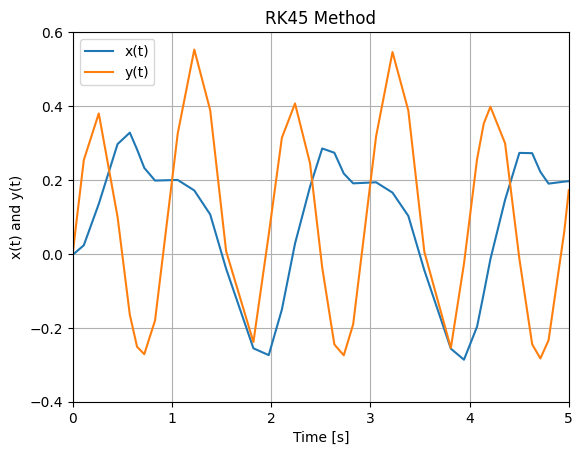

In [62]:
def func(t, x):
    # Define the constants
    m1, m2, k1, k2 = 1, 2, 5, 10
    return [(np.sin(np.pi*t) - k1*x[0]**3 - k2*(x[0]-x[1])**3)/m1, (5*np.cos(2*np.pi*t) - k2*(x[1]-x[0])**3)/m2]

# Use the solve_ivp 
sol = solve_ivp(func, [0, 5], [0, 0], method='RK45')
# ---------------> Plot <---------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("RK45 Method")
# Plot Curves
ax.plot(sol.t, sol.y[0], label="x(t)")
ax.plot(sol.t, sol.y[1], label="y(t)")
# Legend
ax.legend(loc='upper left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel("x(t) and y(t)")
# Axes values to show
ax.set_xlim((0, 5))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

### Question b

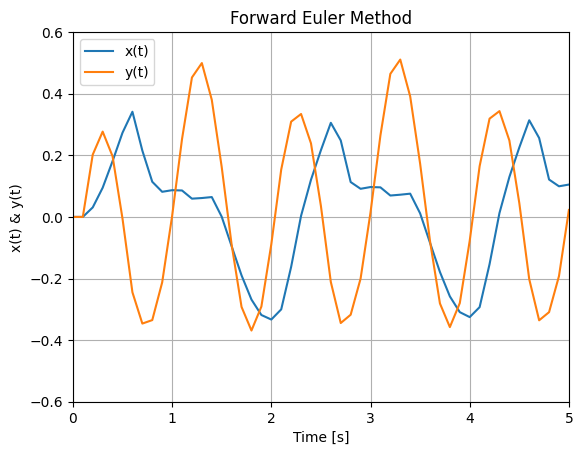

In [63]:
def odeSolver(x0, tInitial, tFinal, h):
    # Define the constants
    m1, m2, k1, k2 = 1, 2, 5, 10
    # Create a time array for the current h 
    time = np.arange(tInitial, tFinal + h, h)
    # Arrays to save u, v and assign the initial conditions
    u = np.zeros((time.shape[0], 2))
    v = np.zeros((time.shape[0], 2))
    # Set initial conditions
    u[0] = x0[0, :]
    v[0] = x0[1, :]
    # Use of Foarward Euler
    for i in range(time.shape[0] - 1):
        # Compute next value of u and v using forward Euler method
        u[i+1, 0] = u[i,0] + h * v[i,0] 
        u[i+1, 1] = u[i,1] + h * v[i,1] 
        v[i+1, 0] = (np.sin(np.pi*time[i+1])-k1*(u[i+1,0])**3-k2*(u[i+1,0]-u[i+1,1])**3)/m1 
        v[i+1, 1] = (5*np.cos(2*np.pi*time[i+1])-k2*(u[i+1,1]-u[i+1,0])**3)/m2
    return time, u, v

# Values of variables
x0 = np.array([[0, 0], [0, 0]])
# Start Time, End time
tInitial, tFinal, h = 0, 5, 0.1
# Computing using Forward Euler
time, u, v = odeSolver(x0, tInitial, tFinal, h)
# ---------------> Plot <---------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Forward Euler Method")
# Plot Curves
ax.plot(time, u[:, 0], label="x(t)")
ax.plot(time, u[:, 1], label="y(t)")
# Legend
ax.legend(loc='upper left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel("x(t) & y(t)")
# Axes values to show
ax.set_xlim((0, 5))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

### Question c

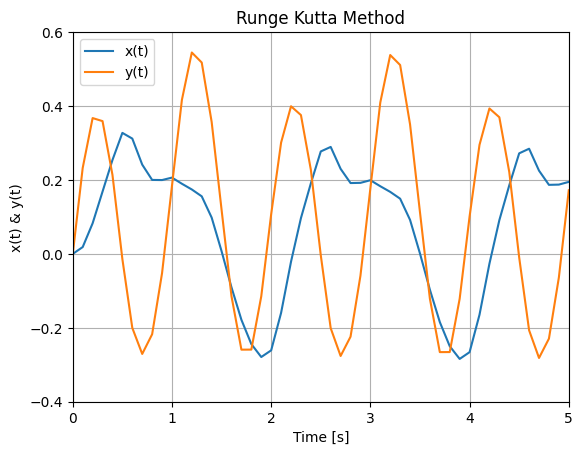

In [64]:
def func(t, x):
    # Define the constants
    m1, m2, k1, k2 = 1, 2, 5, 10
    return [(np.sin(np.pi*t) - k1*x[0]**3 - k2*(x[0]-x[1])**3)/m1, (5*np.cos(2*np.pi*t) - k2*(x[1]-x[0])**3)/m2]

def myRungeKutta(func, x0, tInitial, tFinal, h):
    # Create a time array for the current h 
    time = np.arange(tInitial, tFinal + h, h)
    # Arrays to save x and assign the initial conditions
    x = np.zeros((time.shape[0], 2))
    x[0] = x0
    # Runge Kutta Method
    for i in range(time.shape[0] - 1):
        k1 = h * np.array(func(time[i], x[i]))
        k2 = h * np.array(func(time[i] + h/2, x[i] + k1/2))
        k3 = h * np.array(func(time[i] + h/2, x[i] + k2/2))
        k4 = h * np.array(func(time[i] + h, x[i] + k3))
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return time, x

# Values of variables
x0 = np.array([0, 0])
# Start Time, End time
tInitial, tFinal, h = 0, 5, 0.1
# Computing using Runge Kutta
time, x = myRungeKutta(func, x0, tInitial, tFinal, h)
# ---------------> Plot <---------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Runge Kutta Method")
# Plot Curves
ax.plot(time, x[:, 0], label="x(t)")
ax.plot(time, x[:, 1], label="y(t)")
# Legend
ax.legend(loc='upper left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel("x(t) & y(t)")
# Axes values to show
ax.set_xlim((0, 5))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)

### Question d

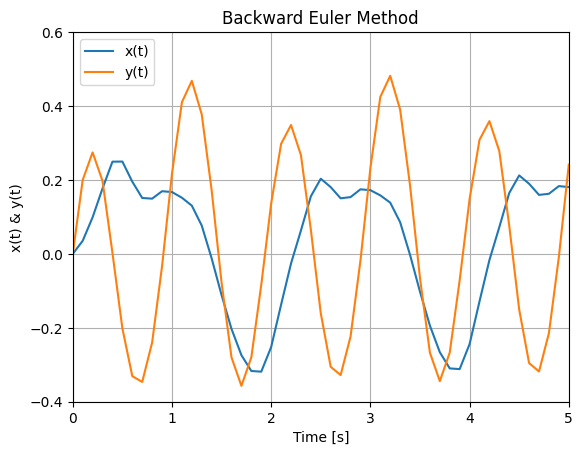

In [65]:
def solve(p, *arg): 
    # Define the constants
    m1, m2, k1, k2 = 1, 2, 5, 10
    # Values
    gamma, h = 1, 0.1
    # Unpack arguments 
    ux, uy, time = arg
    [vx, vy] = p
    # Define equations to be solved
    eq1 = m1 * vx + k1 * (ux + h * gamma * vx) ** 3 + k2 * (ux + h * gamma * vx - uy - h * gamma * vy) ** 3 - np.sin(np.pi * time)
    eq2 = m2 * vy + k2 * (uy + h * gamma * vy - ux - h * gamma * vx) ** 3 - 5 * np.cos(2 * np.pi * time)
    return eq1, eq2

def myBackwardEuler(x0, tInitial, tFinal, h):
    # Create a time array for the current h 
    time = np.arange(tInitial, tFinal + h, h)
    # Arrays to save x and assign the initial conditions
    u = np.zeros((time.shape[0], 2))
    v = np.zeros((time.shape[0], 2))
    # Set initial conditions
    u[0] = x0[0, :]
    v[0] = x0[1, :]
    # Use backward Euler
    for i in range(time.shape[0] - 1):
        arg = (u[i,0], u[i,1], time[i+1])
        v[i+1,0], v[i+1,1] = fsolve(solve, (1, 1), args=arg)
        u[i+1,0] = u[i,0] + h * v[i+1,0]
        u[i+1,1] = u[i,1] + h * v[i+1,1]
    return time, u

# Values of variables
x0 = np.array([[0, 0], [0, 0.25]])
# Start Time, End time
tInitial, tFinal, h = 0, 5, 0.1
# Computing using Runge Kutta
time, x = myBackwardEuler(x0, tInitial, tFinal, h)
# ---------------> Plot <---------------------
# Create Figure and axes
fig, ax = plt.subplots()
# Plot title
plt.title("Backward Euler Method")
# Plot Curves
ax.plot(time, x[:, 0], label="x(t)")
ax.plot(time, x[:, 1], label="y(t)")
# Legend
ax.legend(loc='upper left')
# Axes Labels
ax.set_xlabel('Time [s]')
ax.set_ylabel("x(t) & y(t)")
# Axes values to show
ax.set_xlim((0, 5))
# Axes Ticks
ax.set_xticks(np.linspace(ax.get_xticks()[0], ax.get_xticks()[-1], len(ax.get_xticks())))
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax.get_yticks())))
# Grid
ax.grid(zorder=0)